## Юнит 4 Проект 4 Компьютер говорит "НЕТ"
Работа Иванько Натальи (23_group_dst-11)

In [ ]:
from pandas import Series
import pandas as pd
import numpy as np
import datetime


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [49]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

Объединим обучающий и тестовый датасеты, предварительно введем дополнительный признак (train) принадлежности данных к обучающей (1) или тестовой (0) выборке. Далее будем анализировать и обрабатывать признаки на едином датасете.

In [52]:
train['train'] = 1
test['train'] = 0

df_train = train.append(test, sort=False).reset_index(drop=True)

In [53]:
df_train.head(10)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,train
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0.0,1
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0.0,1
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0.0,1
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0.0,1
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0.0,1
5,41415,18FEB2014,SCH,M,27,Y,N,0,1,-2.032257,0,50,1,1,15000,2,3,N,0.0,1
6,28436,04FEB2014,SCH,M,39,N,N,0,0,-2.225004,0,60,1,2,28000,1,1,N,0.0,1
7,68769,17MAR2014,SCH,F,39,N,N,0,0,-1.522739,1,50,2,3,45000,3,3,N,0.0,1
8,38424,14FEB2014,SCH,F,50,Y,N,1,0,-1.676061,0,50,1,1,30000,1,4,N,0.0,1
9,4496,10JAN2014,UGR,F,54,N,N,0,0,-2.695176,1,50,2,3,24000,1,3,N,0.0,1


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

В датасете имеется только один признак с пропущенными значениями - "уровень образования"

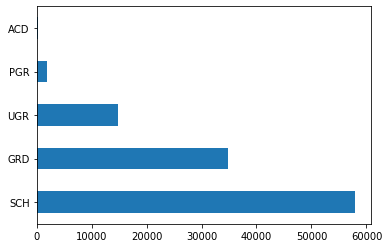

In [55]:
df_train['education'].value_counts().plot.barh()

In [56]:
df_train['education'].value_counts()

SCH    57998
GRD    34768
UGR    14748
PGR     1865
ACD      291
Name: education, dtype: int64

Учитывая, что доля пропущенных значений невелика (0,3%) заполним пропуски наиболее часто встречающимся значением (SCH). 
Кроме того, есть основания в дальнейшем обработать признак как ранговый.

In [57]:
df_train['education'] = df_train['education'].fillna('SCH')
df_train.loc[df_train['education'] == 'SCH', 'education'] = int(0)
df_train.loc[df_train['education'] == 'UGR', 'education'] = int(1)
df_train.loc[df_train['education'] == 'GRD', 'education'] = int(2)
df_train.loc[df_train['education'] == 'PGR', 'education'] = int(3)
df_train.loc[df_train['education'] == 'ACD', 'education'] = int(4)
df_train.education = pd.to_numeric(df_train.education)

Распределим переменные по групппам:

In [58]:
# бинарные переменные
bin_cols = ['sex', 'car', 'car_type', 'foreign_passport', 'good_work']

# числовые переменные
num_cols = ['age', 'decline_app_cnt', 'income', 'bki_request_cnt', 'score_bki']

# ранговые переменные
rang_cols = ['education', 'first_time', 'region_rating', 'sna', 'home_address', 'work_address']

# Проанализируем числовые переменные

## Распределение признака "возраст заемщика"

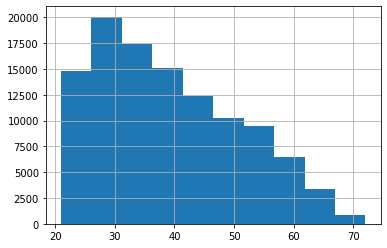

In [59]:
df_train.age.hist()

Распределение возраста заемщиков является логарифмически нормальным, для использования в модели признак логарифмируем.

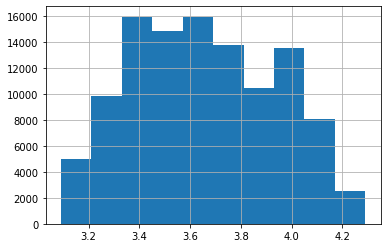

In [60]:
df_train.age = np.log(df_train.age + 1)
df_train.age.hist()

## Распределение признака "Количество отказанных прошлых заявок"

,decline_app_cnt
count,110148.000000
mean,0.273205
std,0.799099
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,33.000000


0     91471
1     12500
2      3622
3      1365
4       606
5       255
6       156
7        58
8        37
9        29
10       16
11       10
12        5
13        4
14        3
16        3
30        1
15        1
19        1
20        1
21        1
22        1
24        1
33        1
Name: decline_app_cnt, dtype: int64

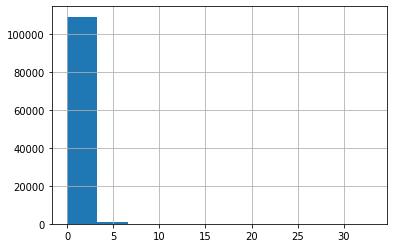

In [61]:
display(
    df_train.decline_app_cnt.hist(),
    pd.DataFrame(df_train.decline_app_cnt.describe()),
    df_train.decline_app_cnt.value_counts())

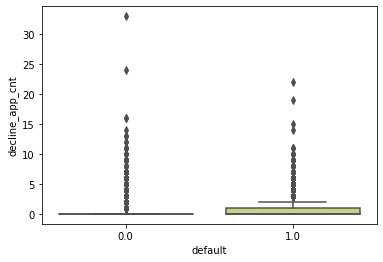

In [62]:
sns.boxplot(x="default", y="decline_app_cnt", data=df_train, palette='rainbow')

In [63]:
df_train.decline_app_cnt.value_counts()/len(df_train)

0     0.830437
1     0.113484
2     0.032883
3     0.012392
4     0.005502
5     0.002315
6     0.001416
7     0.000527
8     0.000336
9     0.000263
10    0.000145
11    0.000091
12    0.000045
13    0.000036
14    0.000027
16    0.000027
30    0.000009
15    0.000009
19    0.000009
20    0.000009
21    0.000009
22    0.000009
24    0.000009
33    0.000009
Name: decline_app_cnt, dtype: float64

83% записей признака имеет значение 0, записи со значением 5 и более в общей сложности составляют 0,5%, в связи с этим первоначально рассматривался вариант замены на 5 всех значений признака, превышающих это значение с дальнейшим логарифмированием. При проверке версий вариант приведения признака к бинарному (0 - отсутствие отказов, 1 - наличие отказов)  вернул результат чуть лучше, таким образом в модели оставлен этот вариант обработки признака. 

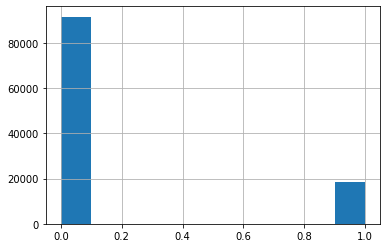

In [64]:
df_train.loc[df_train['decline_app_cnt'] > 0, 'decline_app_cnt'] = 1
df_train.decline_app_cnt.hist()

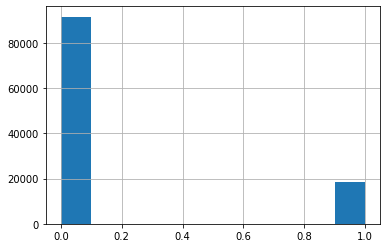

In [65]:
df_train.decline_app_cnt.hist()

## Распределение признака "Количество запросов в БКИ"

,bki_request_cnt
count,110148.000000
mean,2.005002
std,2.266926
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,53.000000


0     28908
1     27295
2     20481
3     13670
4      8406
5      4960
6      2500
7      1292
8       735
9       459
10      350
11      278
12      217
13      151
14      110
15       81
16       58
17       33
18       32
19       30
21       19
20       14
23       12
24       12
22        8
25        5
27        5
28        5
26        4
32        4
29        3
33        2
40        2
41        1
46        1
45        1
47        1
36        1
34        1
53        1
Name: bki_request_cnt, dtype: int64

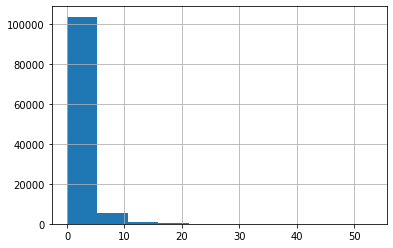

In [66]:
display(
    df_train.bki_request_cnt.hist(),
    pd.DataFrame(df_train.bki_request_cnt.describe()),
    df_train.bki_request_cnt.value_counts())

Поступим с признаком аналогичным образом, признав, что количество запросов БКИ превышающее 10 может иметь схожее влияние на целевую переменную.

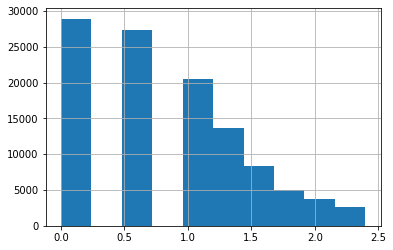

In [67]:
df_train.loc[df_train['bki_request_cnt'] > 10, 'bki_request_cnt'] = 10
df_train.bki_request_cnt = np.log(df_train.bki_request_cnt + 1)
df_train.bki_request_cnt.hist()

## Распределение признака "Доход заемщика"

,income
count,110148.000000
mean,41012.648537
std,45399.735051
min,1000.000000
25%,20000.000000
50%,30000.000000
75%,48000.000000
max,1000000.000000


30000     10437
25000      9090
20000      8174
40000      7383
50000      6742
          ...  
27478         1
27350         1
20412         1
23120         1
426000        1
Name: income, Length: 1207, dtype: int64

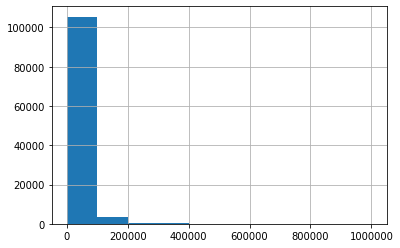

In [68]:
display(
    df_train.income.hist(),
    pd.DataFrame(df_train.income.describe()),
    df_train.income.value_counts())

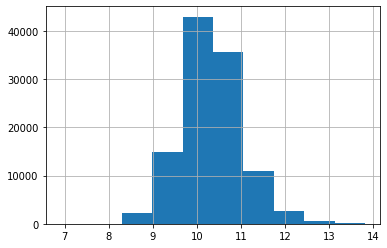

In [69]:
df_train.income = np.log(df_train.income + 1)
df_train.income.hist()

Распределение дохода заемщиков является логарифмически нормальным, для использования в модели возьмем признак после логарифмирования.

## Распределение признака "Скоринговый балл"

,score_bki
count,110148.000000
mean,-1.904535
std,0.499397
min,-3.624586
25%,-2.260434
50%,-1.920823
75%,-1.567888
max,0.199773


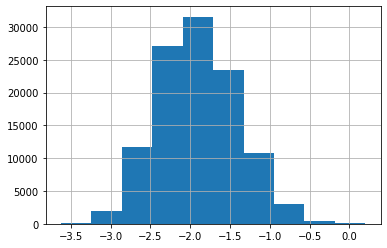

In [70]:
display(
    df_train.score_bki.hist(),
    pd.DataFrame(df_train.score_bki.describe()))

Распределение признака "скоринговый балл" является нормальным, возьмем его в модель в исходном виде.

## Оценка корреляции и значимости числовых переменных

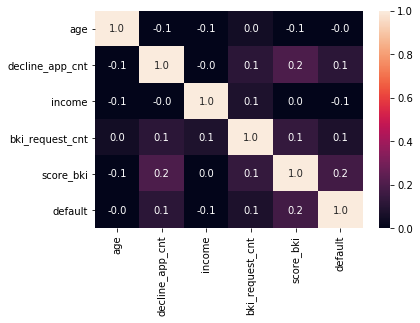

In [71]:
train_start = df_train.query('train == 1').drop(['train'], axis=1)
pl = num_cols+['default']
sns.heatmap(train_start[pl].corr(), annot=True, fmt=".1f", vmin=0, vmax=1)

Числовые признаки слабо коррелируют между собой, все признаки будем использовать в модели.

Оценим значимость числовых переменных с помощью функции f_classif. 

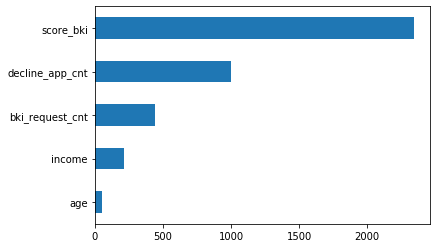

In [72]:
train_start = df_train.query('train == 1').drop(['train'], axis=1)
imp_num = Series(f_classif(train_start[num_cols], train_start['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Самое большое влияние на целевую переменную ожидаемо имеют признаки, связанные с информацией из БКИ: "Скоринговый балл", "Количество отказанных прошлых заявок" и "Количество запросов БКИ".

# Проанализируем ранговые переменные

Анализ ранговых переменных осуществим с применением аналогичных инструментов.

## Распределение признаков "Образование", "Рейтинг региона", "Давность наличия информации о заемщике", "Наличие связи с клиентами банка", "Категоризатор домашнего адреса", "Категоризатор рабочего адреса"

,education
count,110148.000000
mean,0.826552
std,0.952870
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,4.000000


0    58476
2    34768
1    14748
3     1865
4      291
Name: education, dtype: int64

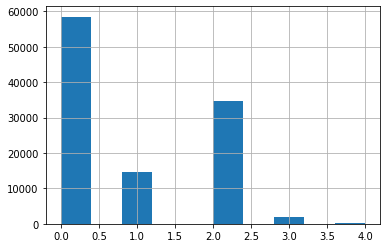

In [73]:
display(
    df_train.education.hist(),
    pd.DataFrame(df_train.education.describe()),
    df_train.education.value_counts())

,region_rating
count,73799.000000
mean,56.725701
std,13.055717
min,20.000000
25%,50.000000
50%,50.000000
75%,60.000000
max,80.000000


50    27523
60    16075
40    12027
80    11469
70     6199
30      300
20      206
Name: region_rating, dtype: int64

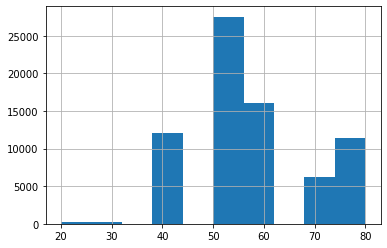

In [74]:
display(
    train.region_rating.hist(),
    pd.DataFrame(train.region_rating.describe()),
    train.region_rating.value_counts())

,first_time
count,110148.000000
mean,2.765570
std,1.010151
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


3    46588
4    28017
1    18296
2    17247
Name: first_time, dtype: int64

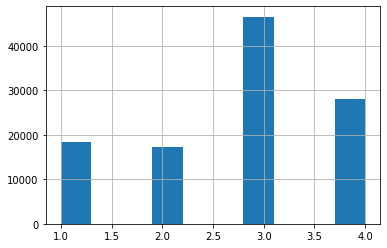

In [75]:
display(
    df_train.first_time.hist(),
    pd.DataFrame(df_train.first_time.describe()),
    df_train.first_time.value_counts())

,sna
count,73799.000000
mean,1.733330
std,1.123622
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


1    47301
4    11749
2    10626
3     4123
Name: sna, dtype: int64

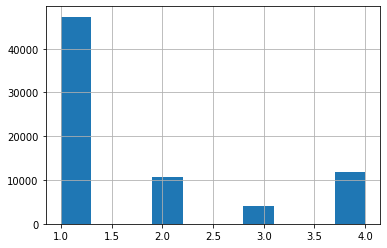

In [76]:
display(
    train.sna.hist(),
    pd.DataFrame(train.sna.describe()),
    train.sna.value_counts())

,home_address
count,110148.000000
mean,1.574945
std,0.527562
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,3.000000


2    59591
1    48688
3     1869
Name: home_address, dtype: int64

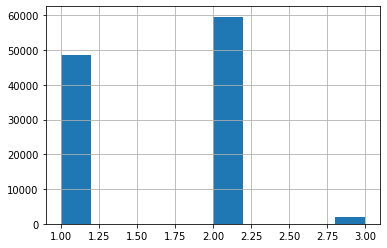

In [77]:
display(
    df_train.home_address.hist(),
    pd.DataFrame(df_train.home_address.describe()),
    df_train.home_address.value_counts())

,work_address
count,110148.000000
mean,2.497867
std,0.687651
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


3    67113
2    30761
1    12274
Name: work_address, dtype: int64

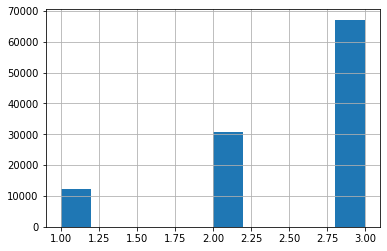

In [78]:
display(
    df_train.work_address.hist(),
    pd.DataFrame(df_train.work_address.describe()),
    df_train.work_address.value_counts())

display(
    train.sna.hist(),
    pd.DataFrame(train.sna.describe()),
    train.sna.value_counts())

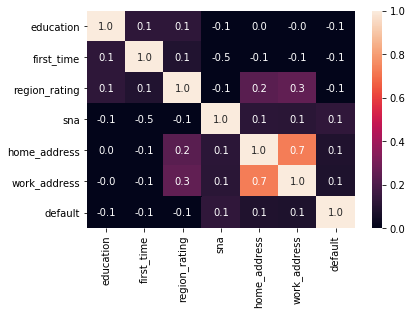

In [79]:
train_start = df_train.query('train == 1').drop(['train'], axis=1)
pl = rang_cols+['default']
sns.heatmap(train_start[pl].corr(), annot=True, fmt=".1f", vmin=0, vmax=1)

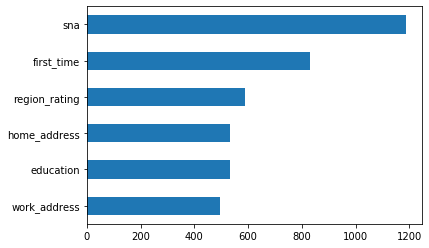

In [80]:
train_start = df_train.query('train == 1').drop(['train'], axis=1)
imp_rang = Series(f_classif(train_start[rang_cols], train_start['default'])[0], index = rang_cols)
imp_rang.sort_values(inplace = True)
imp_rang.plot(kind = 'barh')

Признаки категоризатора домашнего и рабочего адреса проявили сильную корреляцию между собой (0.7). В модель возьмем категоризатор домашнего адреса, поскольку он показал большее влияние на целевую переменую, чем категоризатор рабочего адреса. Остальные ранговые признаки слабо коррелируют между собой, имеют влияние на целевую переменную - все признаки (кроме рабочего адреса) будем использовать в модели с применением масштабирования.Категоризатор рабочего адреса возьмем в модель как категориальный признак, предварительно обработав его как dummy-переменную.

# Проанализируем бинарные переменные

Признаки наличия автомобиля, является ли он иномаркой, наличия загранпаспорта и хорошей работы по своей сути несут ранговый смысл, поэтому сделаем их перекодировку в числовой вормат и применим в модели как ординальные признаки.

In [81]:
df_train['car'].value_counts()

N    74290
Y    35858
Name: car, dtype: int64

In [82]:
df_train.loc[df_train['car'] == 'Y', 'car'] = int(1)
df_train.loc[df_train['car'] == 'N', 'car'] = int(0)
df_train.car = pd.to_numeric(df_train.car)

In [83]:
df_train['car_type'].value_counts()

N    89140
Y    21008
Name: car_type, dtype: int64

In [84]:
df_train.loc[df_train['car_type'] == 'Y', 'car_type'] = int(2)
df_train.loc[df_train['car_type'] == 'N', 'car_type'] = int(0)
df_train.car_type = pd.to_numeric(df_train.car_type)

In [85]:
df_train['car_t']  = df_train[["car", "car_type"]].max(axis=1)
df_train = df_train.drop(["car", "car_type"], axis=1)

In [86]:
df_train['foreign_passport'].value_counts()

N    93721
Y    16427
Name: foreign_passport, dtype: int64

In [87]:
df_train.loc[df_train['foreign_passport'] == 'Y', 'foreign_passport'] = int(1)
df_train.loc[df_train['foreign_passport'] == 'N', 'foreign_passport'] = int(0)
df_train.foreign_passport = pd.to_numeric(df_train.foreign_passport)

Оценим знаимость бинарных признаков с помощью f-classif

In [88]:
# бинарные переменные после обработки
bin_new_cols = ['car_t', 'foreign_passport', 'good_work', 'decline_app_cnt']

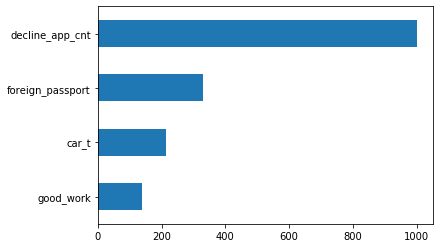

In [89]:
train_start = df_train.query('train == 1').drop(['train'], axis=1)
imp_bin = Series(f_classif(train_start[bin_new_cols], train_start['default'])[0], index = bin_new_cols)
imp_bin.sort_values(inplace = True)
imp_bin.plot(kind = 'barh')

Среди анализируемых переменных наибольшее влияние на целевую переменную показал признак наличия заграничного паспорта. Влияние признака "хорошая работа" также существенно -  в модель берем все проанализированные признаки.

## Обработка признака "дата подачи заявки"

Приведем данные признака "дата подачи заявки" в формат даты и вычислим номер недели для использования его в модели.

In [90]:
df_train.app_date = pd.to_datetime(df_train.app_date)
df_train['week'] = pd.to_datetime(df_train['app_date']).dt.strftime('%W')
df_train.week = pd.to_numeric(df_train.week)
df_train.drop(['app_date'], axis=1, inplace=True)

Оставшиеся категориальные признаки обработаем с помощью get_dummes

In [91]:
cat_new_cols = ['sex', 'work_address']
df_train=pd.get_dummies(df_train, prefix=cat_new_cols, columns=cat_new_cols)

Предварительная обработка данных закончена. Проверим получившийся датасет и выберем признаки, которые необходимо стандартизировать.

In [92]:
df_train.head(5)

,client_id,education,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,income,...,foreign_passport,default,train,car_t,week,sex_F,sex_M,work_address_1,work_address_2,work_address_3
0,25905,0,4.143135,0,0,-2.008753,0.693147,50,1,9.798183,...,0,0.0,1,2,4,0,1,0,1,0
1,63161,0,4.094345,0,0,-1.532276,1.386294,50,2,9.852247,...,0,0.0,1,0,10,1,0,0,0,1
2,25887,0,3.258097,1,0,-1.408142,0.693147,80,1,10.308986,...,1,0.0,1,1,4,0,1,0,1,0
3,16222,0,3.988984,0,0,-2.057471,1.098612,50,2,9.210440,...,0,0.0,1,0,3,1,0,0,0,1
4,101655,2,3.891820,0,1,-1.244723,0.693147,60,2,10.308986,...,1,0.0,1,0,15,0,1,0,0,1


Стандартизируем признаки region_rating, income.

In [93]:
stand_cols = ['region_rating', 'income', 'week']
df_train[stand_cols] = StandardScaler().fit_transform(df_train[stand_cols].values)

In [94]:
df_train.head(10)

,client_id,education,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,income,...,foreign_passport,default,train,car_t,week,sex_F,sex_M,work_address_1,work_address_2,work_address_3
0,25905,0,4.143135,0,0,-2.008753,0.693147,-0.516704,1,-0.786080,...,0,0.0,1,2,-1.002893,0,1,0,1,0
1,63161,0,4.094345,0,0,-1.532276,1.386294,-0.516704,2,-0.708472,...,0,0.0,1,0,0.301287,1,0,0,0,1
2,25887,0,3.258097,1,0,-1.408142,0.693147,1.779355,1,-0.052834,...,1,0.0,1,1,-1.002893,0,1,0,1,0
3,16222,0,3.988984,0,0,-2.057471,1.098612,-0.516704,2,-1.629771,...,0,0.0,1,0,-1.220256,1,0,0,0,1
4,101655,2,3.891820,0,1,-1.244723,0.693147,0.248649,2,-0.052834,...,1,0.0,1,0,1.388104,0,1,0,0,1
5,41415,0,3.332205,0,1,-2.032257,0.000000,-0.516704,1,-1.047783,...,0,0.0,1,1,-0.350803,0,1,1,0,0
6,28436,0,3.688879,0,0,-2.225004,0.000000,0.248649,1,-0.151868,...,0,0.0,1,0,-0.785530,0,1,0,1,0
7,68769,0,3.688879,0,0,-1.522739,0.693147,-0.516704,2,0.529186,...,0,0.0,1,0,0.518650,1,0,0,0,1
8,38424,0,3.931826,1,0,-1.676061,0.000000,-0.516704,1,-0.052834,...,0,0.0,1,1,-0.568166,1,0,1,0,0
9,4496,1,4.007333,0,0,-2.695176,0.693147,-0.516704,2,-0.373139,...,0,0.0,1,0,-1.654983,1,0,0,0,1


## Формирование итогового датасета для обучения

In [95]:
train_data = df_train.query('train == 1').drop(['train'], axis=1)
test_data = df_train.query('train == 0').drop(['train'], axis=1)

X = train_data.drop(['client_id', 'default'], axis=1)
Y = train_data.default.values

Разделим данные для обучения следующим образом:

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
train_data.shape, test_data.shape, X.shape, Y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((73799, 21),
 (36349, 21),
 (73799, 19),
 (73799,),
 (59039, 19),
 (59039,),
 (14760, 19),
 (14760,))

Обучим модель на стандартных настройках логистической регрессии.

In [98]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
probs = model.predict_proba(X_train)
probs = probs[:,1]

In [99]:
probs

array([0.10832135, 0.07623462, 0.10260318, ..., 0.0676077 , 0.07722511,
       0.20866215])

Посмотрим на получившиеся значения метрик качества классифицации:

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(y_train, y_pred))
print(precision_score(y_train, y_pred))
print(recall_score(y_train, y_pred))
print(f1_score(y_train, y_pred))

0.8721523061027456
0.4963144963144963
0.02677269715043075
0.05080482897384306


Построим график кривой ROC AUC

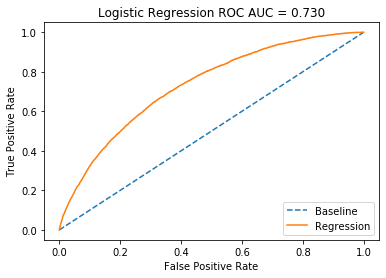

In [101]:
fpr, tpr, threshold = roc_curve(y_train, probs)
roc_auc = roc_auc_score(y_train, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

## Подбор параметров модели

In [119]:
param_grid = {
    'penalty': ['l2', 'elasticnet'],
    'tol': ['1e-3', '1e-5'],
    'C': ['0.1', '0.5', '1', '5', '10'],
    'class_weight': ['dict', 'balanced', 'None'],
    'solver': ['newton-cg', 'lbfgs', 'sag'],
    'max_iter': [500],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    }

In [120]:
model = LogisticRegression(random_state=42)
grid_cv = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1, cv=5)
grid_cv.fit(X_train, y_train)
grid_cv.best_params_

ValueError: Penalty term must be positive; got (C='0.1')

In [121]:
grid_cv.best_params_

{'C': '0.1',
 'class_weight': 'dict',
 'max_iter': 500,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'newton-cg',
 'tol': '1e-3'}

In [133]:
model = LogisticRegression(C=0.1, 
                           class_weight= 'dict', 
                           max_iter= 500,
                           multi_class= 'auto', 
                           penalty= 'l2', 
                           random_state=42,
                           solver = 'newton-cg')
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
probs = model.predict_proba(X_train)
probs = probs[:,1]

In [134]:
print(accuracy_score(y_train, y_pred))
print(precision_score(y_train, y_pred))
print(recall_score(y_train, y_pred))
print(f1_score(y_train, y_pred))

0.8721523061027456
0.4962025316455696
0.025977468522200134
0.04937027707808564


In [135]:
confusion_matrix(y_train, y_pred)

array([[51295,   199],
       [ 7349,   196]], dtype=int64)

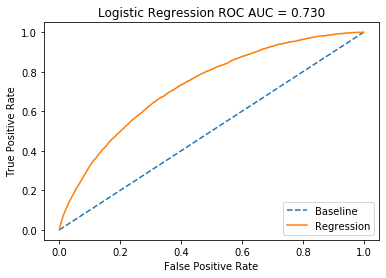

In [136]:
fpr, tpr, threshold = roc_curve(y_train, probs)
roc_auc = roc_auc_score(y_train, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [122]:
param_grid = {
    'penalty': ['l1', 'elasticnet'],
    'tol': ['1e-3', '1e-5'],
    'C': ['0.1', '0.5', '1', '5', '10'],
    'class_weight': ['dict', 'balanced', 'None'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    }

In [123]:
model = LogisticRegression(random_state=42)
grid_cv = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1, cv=5)
grid_cv.fit(X_train, y_train)

ValueError: Penalty term must be positive; got (C='0.1')

In [125]:
grid_cv.best_params_

{'C': '0.1',
 'class_weight': 'dict',
 'max_iter': 500,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': '1e-3'}

In [127]:
model = LogisticRegression(C=0.1, 
                           class_weight= 'balanced', 
                           max_iter= 500,
                           multi_class= 'auto', 
                           penalty= 'l1', 
                           random_state=42,
                           solver = 'liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
probs = model.predict_proba(X_train)
probs = probs[:,1]

In [128]:
print(accuracy_score(y_train, y_pred))
print(precision_score(y_train, y_pred))
print(recall_score(y_train, y_pred))
print(f1_score(y_train, y_pred))

0.6678805535324108
0.22763603522239784
0.6681245858184228
0.3395756146850792


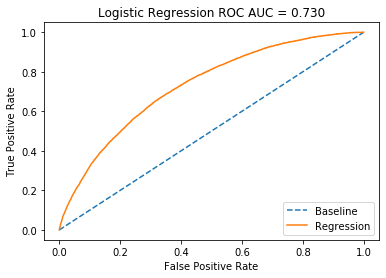

In [129]:
fpr, tpr, threshold = roc_curve(y_train, probs)
roc_auc = roc_auc_score(y_train, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

Берем в работу первый набор параметров, полкольку он показал результат лучше.

# Прогноз данных и формирование итогового файла

In [137]:
model.fit(X, Y)

LogisticRegression(C=0.1, class_weight='dict', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
for_sub = test_data.drop(['client_id', 'default'], axis=1)
prob_sub = model.predict_proba(for_sub)
prob_sub = prob_sub[:,1]

In [139]:
submit = pd.DataFrame(test_data.client_id)
submit['default']=prob_sub
submit.to_csv('submission.csv', index=False)